# Data Investigation: GoodReads Reviews

## Question: Are there any quantitative factors that have a direct correlation with book ratings on GoodReads.com?

### First Question: Are reviews correlated with length of book title? 

### If so, what length of book title produces the best ratings?

First, housekeeping items to get us rolling, such as importing the libraries we need:

In [1103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the csv:

(Important note about the data source: I pulled a spreadsheet of data from Kaggle. The spreadsheet was listed as downloaded from Goodreads.)

In [1104]:
original_book_data = pd.read_csv('books.csv', engine='python')
book_data = original_book_data

First step: Let's learn more about this data set.
Take a look at the first five rows:

In [1105]:
book_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78044E+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78044E+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78044E+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78044E+12,eng,435,2149872,33964,NaN


Run a few more queries to gather intel on the size & shape of this dataset...

In [1106]:
book_data.dtypes

bookID                  int64
title                  object
authors                object
average_rating         object
isbn                   object
isbn13                 object
language_code          object
# num_pages            object
ratings_count           int64
text_reviews_count      int64
Unnamed: 10           float64
dtype: object

In [1107]:
book_data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count',
       'Unnamed: 10'],
      dtype='object')

In [1108]:
book_data.describe()

,bookID,ratings_count,text_reviews_count,Unnamed: 10
count,13719.000000,1.371900e+04,13719.000000,5.000000
mean,22160.579270,1.775903e+04,533.606385,6.200000
std,13699.603351,1.129371e+05,2528.600316,6.418723
min,1.000000,0.000000e+00,0.000000,0.000000
25%,10621.000000,8.300000e+01,7.000000,4.000000
50%,21322.000000,6.300000e+02,40.000000,4.000000
75%,33322.000000,4.737000e+03,222.000000,6.000000
max,47709.000000,5.629932e+06,93619.000000,17.000000


In [1109]:
len(book_data.index)

13719

### Start cleaning up data! 

#### Remove columns and rows I don't want:

Rename '# num_pages' to just 'num_pages' and get rid of 'Unnamed: 10'

In [1110]:
book_data = book_data.rename(columns={'# num_pages': 'num_pages'})
del book_data['Unnamed: 10']
# look at the data again:
book_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78044E+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78044E+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78044E+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78044E+12,eng,435,2149872,33964


I don't need ISBN numbers, although the other information might be interesting later.
Let's remove the two ISBN columns.

In [1111]:
book_data.drop(['isbn', 'isbn13'], axis=1, inplace=True)

I want only books where the language code is English, which means eng or en-US or en-GB

In [1112]:
book_data = book_data.loc[book_data['language_code'].isin(['eng', 'en-US', 'en-GB'])]

Remove rows that contain a specified list of words:

(I made an executive decision about words that I felt didn't help the dataset.)

In [1113]:
drop_row_words = ['Boxed', 'boxed', 'Unauthorized', 'unauthorized', 'Collection', 'Ultimate', 'Vols', 'Anthology', 'Collected', 'Bible', 'Gospel', 'Complete', 'Anniversary']
for word in drop_row_words:
    book_data = book_data[~book_data['title'].str.contains(pat = word)]
    inplace=True

In [1114]:
print(book_data.title[0:10])

0     Harry Potter and the Half-Blood Prince (Harry ...
1     Harry Potter and the Order of the Phoenix (Har...
2     Harry Potter and the Sorcerer's Stone (Harry P...
3     Harry Potter and the Chamber of Secrets (Harry...
4     Harry Potter and the Prisoner of Azkaban (Harr...
10    The Hitchhiker's Guide to the Galaxy (Hitchhik...
11    The Hitchhiker's Guide to the Galaxy (Hitchhik...
13                 A Short History of Nearly Everything
14                          Bill Bryson's African Diary
15    Bryson's Dictionary of Troublesome Words: A Wr...
Name: title, dtype: object


### Review our dataset

Now how many rows do we have?

In [1115]:
len(book_data.index)

12258

In [1116]:
book_data.describe()

,bookID,ratings_count,text_reviews_count
count,12258.000000,1.225800e+04,12258.000000
mean,21982.982379,1.947741e+04,586.668951
std,13621.491450,1.189233e+05,2658.098293
min,1.000000,0.000000e+00,0.000000
25%,10519.500000,1.170000e+02,10.000000
50%,20951.500000,8.305000e+02,51.500000
75%,33025.750000,5.730500e+03,261.000000
max,47709.000000,5.629932e+06,93619.000000


In [1117]:
book_data.head(10)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
10,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4416,408
11,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams-Stephen Fry,4.22,eng,6,1222,253
13,21,A Short History of Nearly Everything,Bill Bryson-William Roberts,4.2,eng,544,228522,8840
14,22,Bill Bryson's African Diary,Bill Bryson,3.43,eng,55,6993,470
15,23,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.88,eng,256,2020,124


## Clean up title so I can count words

Title Cleaning:
Eventual goal of this section will be to get rid of everything after a "("

In [1118]:
# insert a new column to hold the truncated title
book_data.insert(2, 'cleaned_title', 'placeholder')
# insert a new column that will eventually hold the wordcount of the cleaned title
book_data.insert(3, 'title_word_count', '-')

In [1119]:
book_data.head()

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,placeholder,-,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,placeholder,-,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,placeholder,-,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,placeholder,-,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,placeholder,-,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


fix order of columns

In [1120]:
clist = ['bookID', 'title', 'cleaned_title', 'title_word_count', 'authors', 'average_rating', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count']
book_data = book_data[clist]
book_data.head()

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,placeholder,-,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,placeholder,-,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,placeholder,-,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,placeholder,-,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,placeholder,-,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [1121]:
seperator = '('

for index, row in book_data.iterrows():
    first_title_chunk = row[1].split(seperator, 1)[0]
    # this next part puts the resulting split title into a new column:
    book_data.at[index,'cleaned_title'] = first_title_chunk

In [1122]:
book_data.head(10)

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince,-,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix,-,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter and the Sorcerer's Stone,-,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,Harry Potter and the Chamber of Secrets,-,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban,-,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
10,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,The Hitchhiker's Guide to the Galaxy,-,Douglas Adams,4.22,eng,215,4416,408
11,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,The Hitchhiker's Guide to the Galaxy,-,Douglas Adams-Stephen Fry,4.22,eng,6,1222,253
13,21,A Short History of Nearly Everything,A Short History of Nearly Everything,-,Bill Bryson-William Roberts,4.2,eng,544,228522,8840
14,22,Bill Bryson's African Diary,Bill Bryson's African Diary,-,Bill Bryson,3.43,eng,55,6993,470
15,23,Bryson's Dictionary of Troublesome Words: A Wr...,Bryson's Dictionary of Troublesome Words: A Wr...,-,Bill Bryson,3.88,eng,256,2020,124


Count number of words in cleaned_title

In [1123]:
for index, row in book_data.iterrows():
    # the tricky bit here is to remember to use split() so you're counting words, not characters in the line
    title_length = len(row['title'].split())
    # put the word count into its own column:
    book_data.at[index, 'title_word_count'] = title_length

In [1124]:
book_data.head(10)

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince,9,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix,11,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter and the Sorcerer's Stone,9,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,Harry Potter and the Chamber of Secrets,10,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban,10,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
10,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,The Hitchhiker's Guide to the Galaxy,12,Douglas Adams,4.22,eng,215,4416,408
11,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,The Hitchhiker's Guide to the Galaxy,12,Douglas Adams-Stephen Fry,4.22,eng,6,1222,253
13,21,A Short History of Nearly Everything,A Short History of Nearly Everything,6,Bill Bryson-William Roberts,4.2,eng,544,228522,8840
14,22,Bill Bryson's African Diary,Bill Bryson's African Diary,4,Bill Bryson,3.43,eng,55,6993,470
15,23,Bryson's Dictionary of Troublesome Words: A Wr...,Bryson's Dictionary of Troublesome Words: A Wr...,12,Bill Bryson,3.88,eng,256,2020,124


In [1125]:
book_data.cleaned_title[0:20]

0               Harry Potter and the Half-Blood Prince 
1            Harry Potter and the Order of the Phoenix 
2                Harry Potter and the Sorcerer's Stone 
3              Harry Potter and the Chamber of Secrets 
4             Harry Potter and the Prisoner of Azkaban 
10                The Hitchhiker's Guide to the Galaxy 
11                The Hitchhiker's Guide to the Galaxy 
13                 A Short History of Nearly Everything
14                          Bill Bryson's African Diary
15    Bryson's Dictionary of Troublesome Words: A Wr...
16                               In a Sunburned Country
17    I'm a Stranger Here Myself: Notes on Returning...
18    The Lost Continent: Travels in Small Town America
19            Neither Here nor There: Travels in Europe
20                            Notes from a Small Island
21    The Mother Tongue: English and How It Got That...
23                               The Lord of the Rings 
24                               The Lord of the

Reorder data: sort by average rating

In [1126]:
book_data.sort_values(by=['average_rating'], ascending=False, inplace=True)
book_data.head(10)

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
6790,20954,Winchester Shotguns,Winchester Shotguns,2,Dennis Adler-R.L. Wilson,5,eng,372,2,0
6600,19788,The Goon Show Volume 11: He's Fallen in the W...,The Goon Show Volume 11: He's Fallen in the W...,10,NOT A BOOK,5,eng,2,2,0
1624,4874,The Decoration of the Torre de la Parada (Corp...,The Decoration of the Torre de la Parada,18,Svetlana Alpers,5,eng,532,1,0
1442,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough,7,Middlesex Borough Heritage Committee,5,eng,128,2,0
7509,23552,The New Big Book of America,The New Big Book of America,6,Todd Davis-Marc Frey,5,eng,56,2,1
7437,23276,Taxation of Mineral Rents,Taxation of Mineral Rents,4,Ross Garnaut,5,eng,350,1,0
963,2843,Literature Circle Guide: Bridge to Terabithia:...,Literature Circle Guide: Bridge to Terabithia:...,21,Tara MacCarthy,5,eng,32,4,1
6843,21248,Lake Orion (Images of America: Michigan),Lake Orion,6,James E. Ingram-Lori Grove,5,eng,128,0,0
11072,36781,Bubbles in the Middle (The Powerpuff Girls Plu...,Bubbles in the Middle,11,Aaron Rosenberg-Christopher Cook,5,eng,64,5,0
11074,36853,Tyrannosaurus Wrecks (Stanley #1),Tyrannosaurus Wrecks,4,Laura Driscoll-Alisa Klayman-Grodsky-Eric ...,5,eng,24,2,1


This has revealed that we have more data cleaning to do.

Remove rows where the author is "NOT A BOOK"

In [1127]:
book_data[book_data.authors != 'NOT A BOOK']

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
6790,20954,Winchester Shotguns,Winchester Shotguns,2,Dennis Adler-R.L. Wilson,5,eng,372,2,0
1624,4874,The Decoration of the Torre de la Parada (Corp...,The Decoration of the Torre de la Parada,18,Svetlana Alpers,5,eng,532,1,0
1442,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough,7,Middlesex Borough Heritage Committee,5,eng,128,2,0
7509,23552,The New Big Book of America,The New Big Book of America,6,Todd Davis-Marc Frey,5,eng,56,2,1
7437,23276,Taxation of Mineral Rents,Taxation of Mineral Rents,4,Ross Garnaut,5,eng,350,1,0
963,2843,Literature Circle Guide: Bridge to Terabithia:...,Literature Circle Guide: Bridge to Terabithia:...,21,Tara MacCarthy,5,eng,32,4,1
6843,21248,Lake Orion (Images of America: Michigan),Lake Orion,6,James E. Ingram-Lori Grove,5,eng,128,0,0
11072,36781,Bubbles in the Middle (The Powerpuff Girls Plu...,Bubbles in the Middle,11,Aaron Rosenberg-Christopher Cook,5,eng,64,5,0
11074,36853,Tyrannosaurus Wrecks (Stanley #1),Tyrannosaurus Wrecks,4,Laura Driscoll-Alisa Klayman-Grodsky-Eric ...,5,eng,24,2,1
4940,14741,Zone of the Enders: The 2nd Runner Official St...,Zone of the Enders: The 2nd Runner Official St...,10,Tim Bogenn,5,eng,128,2,0


Remove rows where there are fewer than 25 total ratings, and fewer than 5 text reviews

In [1128]:
drop_condition = book_data[book_data['ratings_count'] < 25].index
book_data.drop(drop_condition, inplace=True)

In [1129]:
drop_condition = book_data[book_data['text_reviews_count'] < 5].index
book_data.drop(drop_condition, inplace=True)

In [1130]:
book_data.head(20)

,bookID,title,cleaned_title,title_word_count,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
7927,24814,It's a Magical World (Calvin and Hobbes #11),It's a Magical World,8,Bill Watterson,4.76,eng,176,23336,294
7928,24815,The Indispensable Calvin and Hobbes,The Indispensable Calvin and Hobbes,5,Bill Watterson,4.74,eng,255,15641,291
2182,6550,Early Color,Early Color,2,Saul Leiter-Martin Harrison,4.73,eng,156,114,7
7929,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Homicidal Psycho Jungle Cat,8,Bill Watterson,4.72,eng,176,14952,277
8407,26558,The Revenge of the Baby-Sat,The Revenge of the Baby-Sat,5,Bill Watterson,4.72,eng,128,50,5
7933,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,9,Bill Watterson,4.71,eng,96,3537,82
8451,26805,The Sibley Field Guide to Birds of Western Nor...,The Sibley Field Guide to Birds of Western Nor...,10,David Allen Sibley,4.7,en-US,473,709,35
10612,34545,Elliott Erwitt: Snaps,Elliott Erwitt: Snaps,3,Murray Sayle-Charles Flowers-Elliott Erwitt,4.7,en-GB,544,96,6
7931,24818,The Days Are Just Packed,The Days Are Just Packed,5,Bill Watterson,4.69,eng,176,20021,236
7818,24494,The Calvin and Hobbes Lazy Sunday Book,The Calvin and Hobbes Lazy Sunday Book,7,Bill Watterson,4.67,eng,128,19364,196


In [1131]:
book_data.title_word_count.describe()

count     10218
unique       31
top           3
freq       1424
Name: title_word_count, dtype: int64

I'm making a decision to exclude all rows with more than 20 words in the title. Because more than 20 words in a title is just... silly.

In [1132]:
drop_title_condition = book_data[book_data['title_word_count'] > 20].index
book_data.drop(drop_title_condition, inplace=True)

In [1133]:
len(book_data.index)

10169

A little investigation into data types because of some trouble I had with plotting...

In [1134]:
book_data.dtypes

bookID                 int64
title                 object
cleaned_title         object
title_word_count      object
authors               object
average_rating        object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
dtype: object

In [1135]:
book_data[['title_word_count']] = book_data[['title_word_count']].astype(int)
book_data[['average_rating']] = book_data[['average_rating']].astype(float)
book_data[['num_pages']] = book_data[['num_pages']].astype(int)

In [1136]:
book_data.dtypes

bookID                  int64
title                  object
cleaned_title          object
title_word_count        int64
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
dtype: object

The list looks clean enough to me now. Back to the original question: Is there a correlation between length of title and total rating score?

Let's visualize using a scatterplot:

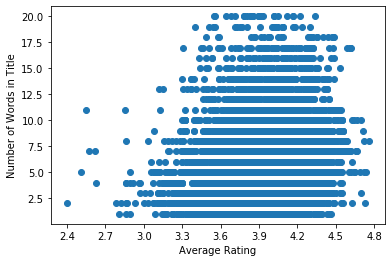

In [1137]:
import matplotlib.pyplot as plt
from numpy import arange
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["title_word_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Words in Title")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

plt.show()


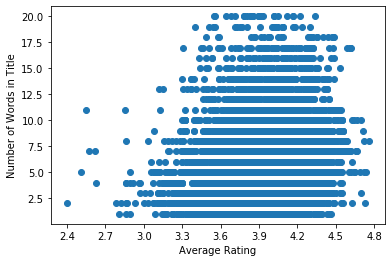

In [1138]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["title_word_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Words in Title")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

# reverse the values of the x-axis
#ax.set_xlim(ax.get_xlim()[::-1])

plt.show()


I really wanted a trend line, so I searched the internet and copied some code: 

(so please note, the following is outside my own skillset)

(thank you, StackOverflow)

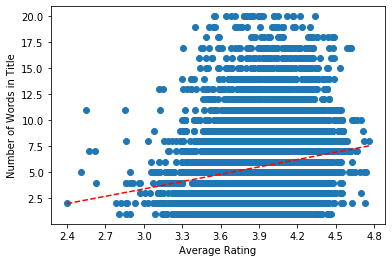

In [1139]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["title_word_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Words in Title")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

z = np.polyfit(xaxis, yaxis, 1)
p = np.poly1d(z)
plt.plot(xaxis,p(xaxis),"r--")


That doesn't look promising. Still, let's see if there's a correlation. (What follows is two different ways I found to do this. Note that I took a lot of stats in college, but... it's been a few years. So thank goodness for programmatic solutions.)

In [1140]:
correlation = book_data['average_rating'].corr(book_data['title_word_count'])
# default method is 'pearson'
# recommended reading: https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
print(correlation)

0.1780119619568523


Is this correlation statistically significant?

In [1141]:
xaxis = book_data["average_rating"]
yaxis = book_data["title_word_count"]

import scipy
import scipy.stats
stats_result = scipy.stats.pearsonr(xaxis, yaxis)
pvalue = stats_result[1]
pvalue_round = round(pvalue, 5)
print("p-value in sci notation, and then rounded:")
print(pvalue)
print(pvalue_round)

p-value in sci notation, and then rounded:
3.5879580609578785e-73
0.0


Pretty close to zero statistical significance.

## Conclusion:

Q: Are ratings related to length of book title?

A: No.

Looking at the data made me consider a different question:

## Question: Is the Average Rating correlated with Number of Reviews?

Since we did so much cleanup work above, we can repurpose a lot of the code to get to an answer much more quickly.

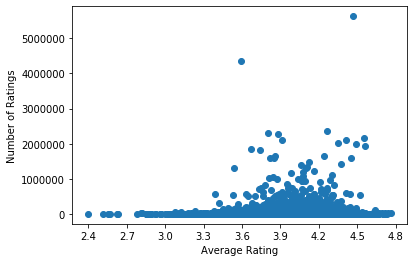

In [1142]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["ratings_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Ratings")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

plt.show()

Ooo... there are definitely some outliers.
Review the shape of the data:

In [1143]:
book_data.ratings_count.describe()

count    1.016900e+04
mean     2.345121e+04
std      1.302120e+05
min      2.500000e+01
25%      3.200000e+02
50%      1.564000e+03
75%      8.496000e+03
max      5.629932e+06
Name: ratings_count, dtype: float64

Remove the rows of ratings that have more than 25,000 ratings:

In [1144]:
drop_ratings_condition = book_data[book_data['ratings_count'] > 25000].index
book_data.drop(drop_ratings_condition, inplace=True)

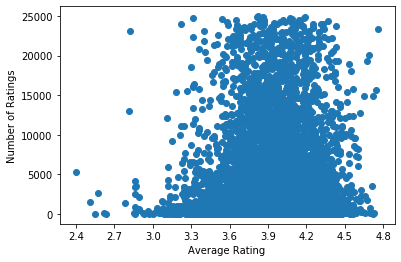

In [1145]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["ratings_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Ratings")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

plt.show()

Now add a trend line:

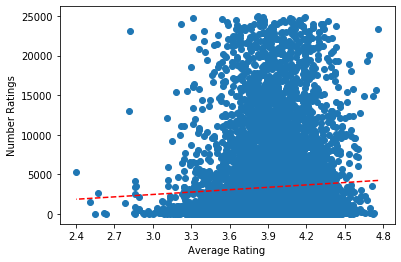

In [1146]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["ratings_count"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number Ratings")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

z = np.polyfit(xaxis, yaxis, 1)
p = np.poly1d(z)
plt.plot(xaxis,p(xaxis),"r--")


In [1147]:
xaxis = book_data["average_rating"]
yaxis = book_data["ratings_count"]

stats_result = scipy.stats.pearsonr(xaxis, yaxis)
correlation = stats_result[0]
pvalue = stats_result[1]
pvalue_round = round(pvalue, 5)
print("correlation: ")
print(correlation)
print("p-value in sci notation, and then rounded:")
print(pvalue)
print(pvalue_round)

correlation: 
0.05312276144719439
p-value in sci notation, and then rounded:
5.632023026550771e-07
0.0


## Conclusion:

Q: Are ratings related to the sheer number of reviews?

A: No.

Let's try one more question...

## Question: Are reviews related to the number of pages in the book?

Plot with a trend line:

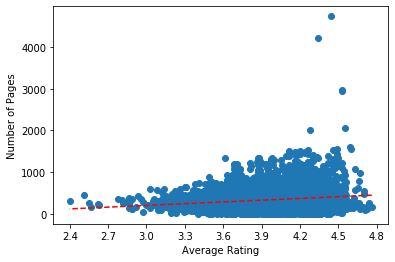

In [1148]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["num_pages"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Pages")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

z = np.polyfit(xaxis, yaxis, 1)
p = np.poly1d(z)
plt.plot(xaxis,p(xaxis),"r--")

Remove outliers, which I'll define as over 2000 pages

In [1149]:
drop_pages_condition = book_data[book_data['num_pages'] > 2000].index
book_data.drop(drop_pages_condition, inplace=True)

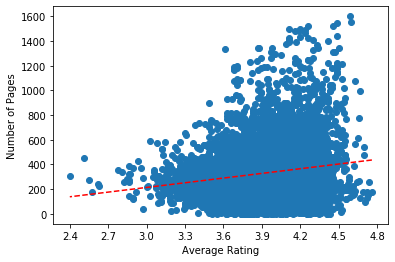

In [1150]:
fig, ax = plt.subplots()

xaxis = book_data["average_rating"]
yaxis = book_data["num_pages"]

# define values for x and y axis
ax.scatter(xaxis, yaxis)

plt.xlabel("Average Rating")
plt.ylabel("Number of Pages")

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

z = np.polyfit(xaxis, yaxis, 1)
p = np.poly1d(z)
plt.plot(xaxis,p(xaxis),"r--")

Look for correlation:

In [1151]:
xaxis = book_data["average_rating"]
yaxis = book_data["num_pages"]

stats_result = scipy.stats.pearsonr(xaxis, yaxis)
correlation = stats_result[0]
pvalue = stats_result[1]
pvalue_round = round(pvalue, 5)
print("correlation: ")
print(correlation)
print("p-value in sci notation, and then rounded:")
print(pvalue)
print(pvalue_round)

correlation: 
0.16716686743434991
p-value in sci notation, and then rounded:
1.650102641504093e-56
0.0


And still... no.

## Conclusion:

Q: Are ratings related to the number of pages?

A: No.

# Conclusion: Summary

I wondered if there are quantitative factors that influence the overall star-rating of a book on GoodReads.com. I looked for a correlation between rating and length of title, number of reviews, and number of pages. The analysis shows that there is no statistically meaningful correlation between rating and any of the three factors that I looked at.